# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print(cities[1])

Number of cities in the list: 641
msanga


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
print(weather_api_key)

d770832978a832fe8fc18861f701589c


In [38]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "metric"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(weather_json)
print(weather_json['coord']['lon'])
print(query_url)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.24, 'feels_like': 10.74, 'temp_min': 10.47, 'temp_max': 11.86, 'pressure': 1024, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 210}, 'clouds': {'all': 100}, 'dt': 1712769576, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1712726083, 'sunset': 1712774897}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}
-0.1257
http://api.openweathermap.org/data/2.5/weather?appid=d770832978a832fe8fc18861f701589c&units=metric&q=London


In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=d770832978a832fe8fc18861f701589c&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    print(i)
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
0
Processing Record 1 of Set 1 | ahau
City not found. Skipping...
1
Processing Record 2 of Set 1 | msanga
2
Processing Record 3 of Set 1 | iqaluit
3
Processing Record 4 of Set 1 | hawaiian paradise park
4
Processing Record 5 of Set 1 | blackmans bay
5
Processing Record 6 of Set 1 | keflavik
6
Processing Record 7 of Set 1 | buala
7
Processing Record 8 of Set 1 | uray
8
Processing Record 9 of Set 1 | lebu
9
Processing Record 10 of Set 1 | nadym
10
Processing Record 11 of Set 1 | sisimiut
11
Processing Record 12 of Set 1 | nar'yan-mar
12
Processing Record 13 of Set 1 | adamstown
13
Processing Record 14 of Set 1 | waitangi
14
Processing Record 15 of Set 1 | carnarvon
15
Processing Record 16 of Set 1 | sinabang
16
Processing Record 17 of Set 1 | port elizabeth
17
Processing Record 18 of Set 1 | west island
18
Processing Record 19 of Set 1 | happy valley-goose bay
19
Processing Record 20 of Set 1 | invercargill
20
Processing Record 

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,msanga,-6.0500,36.0333,22.25,85,48,2.23,TZ,1712770041
1,iqaluit,63.7506,-68.5145,-1.15,63,75,1.54,CA,1712770041
2,hawaiian paradise park,19.5933,-154.9731,19.46,98,100,0.45,US,1712770041
3,blackmans bay,-43.0167,147.3167,10.29,86,75,0.45,AU,1712770042
4,keflavik,64.0049,-22.5624,6.95,65,75,8.23,IS,1712770042


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,msanga,-6.0500,36.0333,22.25,85,48,2.23,TZ,1712770041
1,iqaluit,63.7506,-68.5145,-1.15,63,75,1.54,CA,1712770041
2,hawaiian paradise park,19.5933,-154.9731,19.46,98,100,0.45,US,1712770041
3,blackmans bay,-43.0167,147.3167,10.29,86,75,0.45,AU,1712770042
4,keflavik,64.0049,-22.5624,6.95,65,75,8.23,IS,1712770042


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

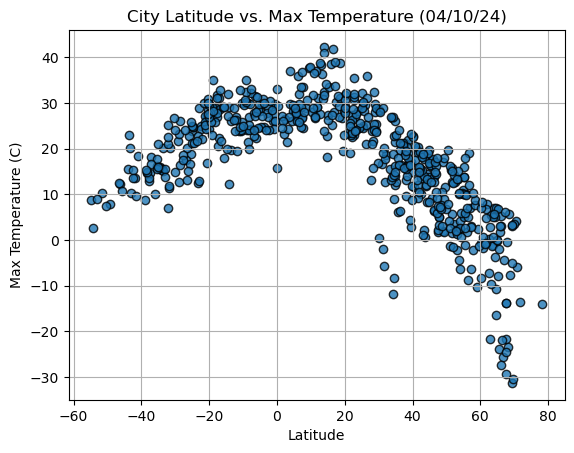

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

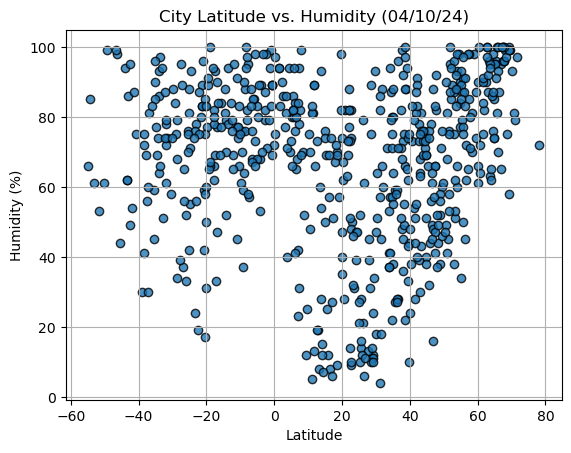

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

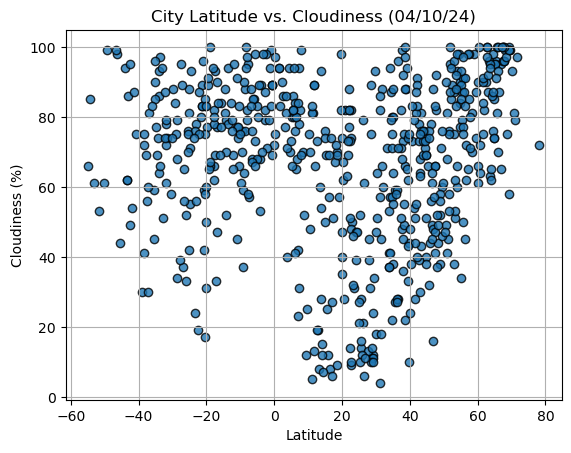

In [53]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker = "o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

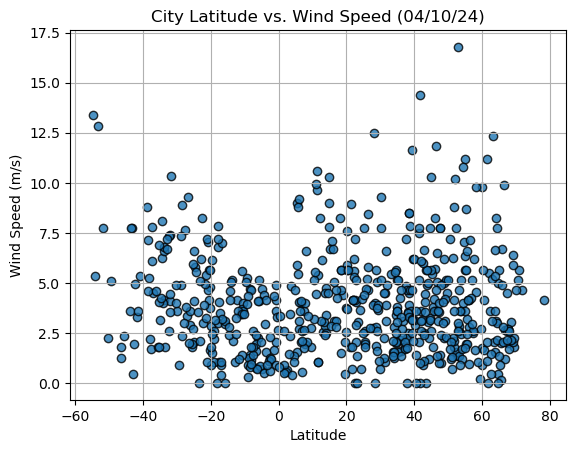

In [55]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [109]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    return plt

In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-1.15,63,75,1.54,CA,1712770041
2,hawaiian paradise park,19.5933,-154.9731,19.46,98,100,0.45,US,1712770041
4,keflavik,64.0049,-22.5624,6.95,65,75,8.23,IS,1712770042
6,uray,60.1247,64.7758,-0.63,66,100,0.89,RU,1712770042
8,nadym,65.5333,72.5167,-23.91,96,27,2.00,RU,1712770042


In [63]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,msanga,-6.0500,36.0333,22.25,85,48,2.23,TZ,1712770041
3,blackmans bay,-43.0167,147.3167,10.29,86,75,0.45,AU,1712770042
5,buala,-8.1450,159.5921,26.91,82,91,1.16,SB,1712770042
7,lebu,-37.6167,-73.6500,12.92,56,100,1.69,CL,1712770042
11,adamstown,-25.0660,-130.1015,23.74,81,100,4.08,PN,1712770043


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.829752297759476


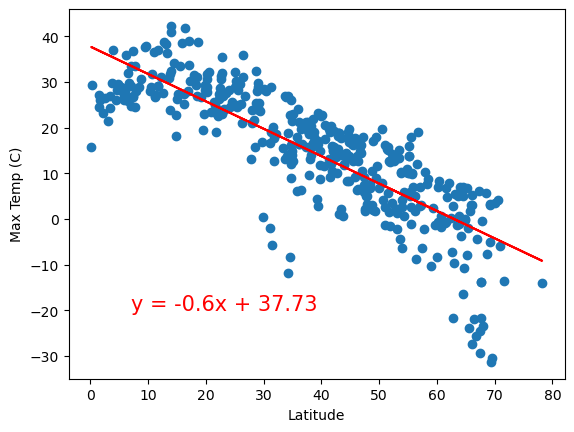

In [111]:
# Linear regression on Northern Hemisphere
ntemp_lat = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp',(7,-20))
ntemp_lat.ylabel("Max Temp (C)")
ntemp_lat.show()

The r-squared is: 0.7670313779334358


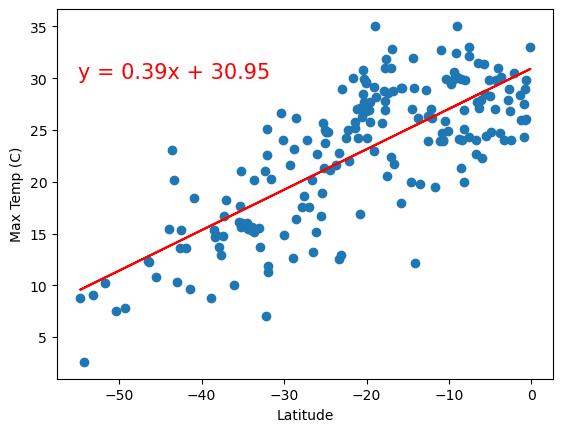

In [112]:
# Linear regression on Southern Hemisphere
stemp_lat = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp',(-55,30))
stemp_lat.ylabel("Max Temp (C)")
stemp_lat.show()

**Discussion about the linear relationship:** 



### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3417361575532526


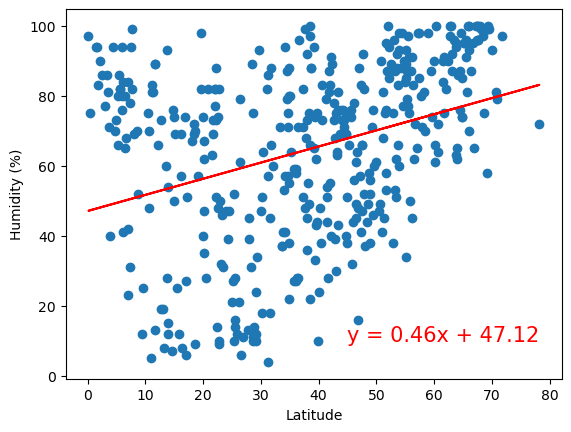

In [113]:
# Northern Hemisphere
nhum_lat = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity',(45,10))
nhum_lat.ylabel("Humidity (%)")
nhum_lat.show()

The r-squared is: 0.17727757123902566


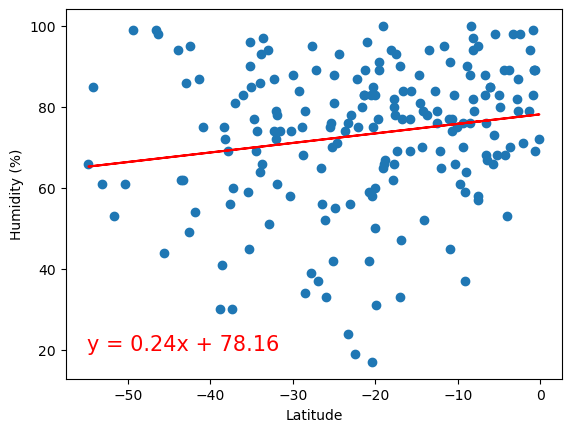

In [114]:
# Southern Hemisphere
shum_lat = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity',(-55,20))
shum_lat.ylabel("Humidity (%)")
shum_lat.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1567790107671993


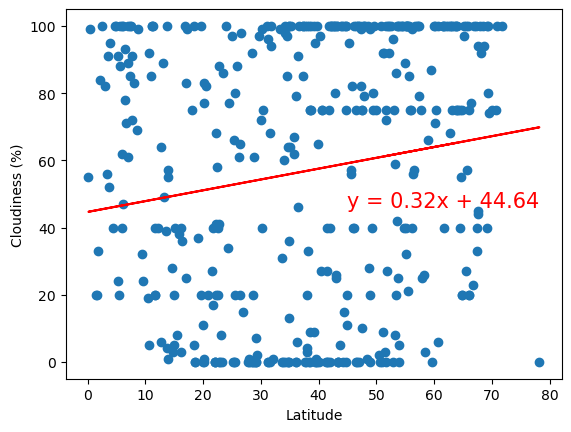

In [115]:
# Northern Hemisphere
ncloud_lat = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness',(45,46))
ncloud_lat.ylabel("Cloudiness (%)")
ncloud_lat.show()

The r-squared is: 0.1761086397701162


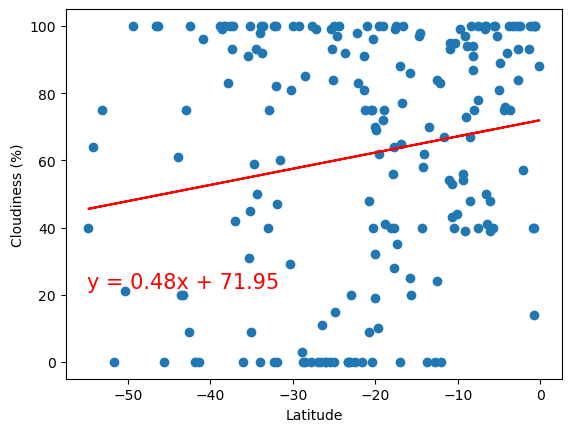

In [116]:
# Southern Hemisphere
scloud_lat = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness',(-55,22))
scloud_lat.ylabel("Cloudiness (%)")
scloud_lat.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003101398594664645


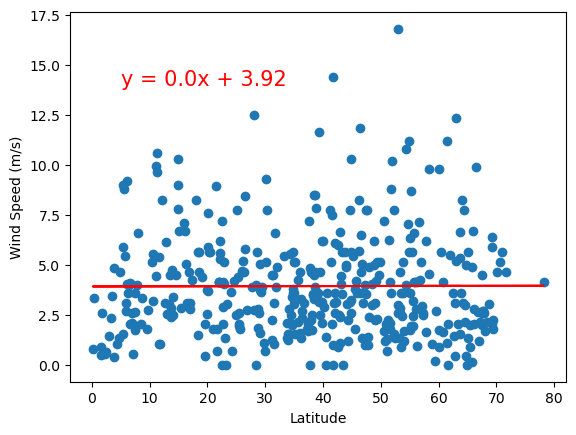

In [118]:
# Northern Hemisphere
nwind_lat = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed',(5,14))
nwind_lat.ylabel("Wind Speed (m/s)")
nwind_lat.show()

The r-squared is: -0.4290762076250212


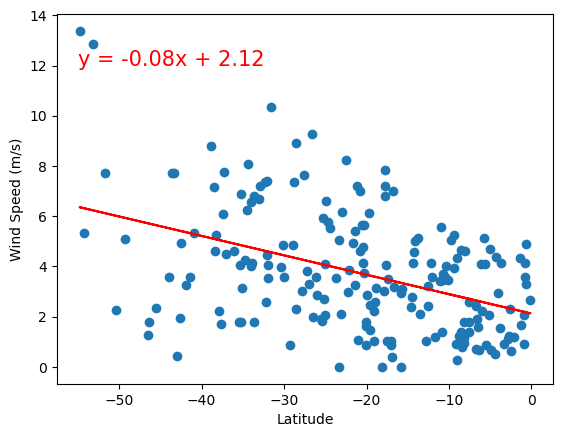

In [119]:
# Southern Hemisphere
swind_lat = plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed',(-55,12))
swind_lat.ylabel("Wind Speed (m/s)")
swind_lat.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE